IMPORTING LIBRARIES

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


LOADING THE DATA SETS(train_data)

In [16]:
train_data=pd.read_csv('big_data_mart_train.csv')
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Top 5 heads of the train data

In [7]:
train_data.shape

(8523, 12)

In train_data there is 8523 rows and 12 columns

In [8]:
train_data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

we have 4 float data type columns, 1 integer data type columns and 7 object data type columns in train data.

In [9]:
# checking unique value in the dataset
train_data.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

columns with more number of unique values are of integer data type.

In [11]:
#checking null values

train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

we have 2 columns with missing values that is Item_weight and outlet_size.

LOADING THE DATASET(test_data)

In [18]:
test_data=pd.read_csv('big_data_mart_test.csv')
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


top 5 heads of the test_data only difference is Item_Outlet_Sales column is misssing here.

In [20]:
test_data.shape

(5681, 11)

In test_data we have 5681 rows and 11 columns.

In [22]:
test_data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

we have 3 float data type columns, 1 integer data type columns and 7 object data type columns in  test_data.

In [24]:
# checking unique value in the dataset
test_data.apply(lambda x: len(x.unique()))

Item_Identifier              1543
Item_Weight                   411
Item_Fat_Content                5
Item_Visibility              5277
Item_Type                      16
Item_MRP                     4402
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
dtype: int64

columns with more number of unique values are of integer data type.

In [25]:
#checking null values

test_data.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

we have 2 columns with missing values that is Item_weight and outlet_size.



PREPROCESSING THE DATASETS

In [26]:
train_data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [27]:
test_data['Item_Fat_Content'].unique()

array(['Low Fat', 'reg', 'Regular', 'LF', 'low fat'], dtype=object)

In both the datasets , there is 4 unique values in Item_Fat_Content column with two time repetations.

In [28]:
#comibining Item_Fat_Content to avoid repetations in both the datasets
train_data['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)

test_data['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)

In [29]:
#creating new columns
train_data['num_years'] = train_data['Outlet_Establishment_Year'].apply(lambda x: 2013 - x) 

test_data['num_years'] = test_data['Outlet_Establishment_Year'].apply(lambda x: 2013 - x)

In [30]:
train_data['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

many unique values in Item_type column

EDA

FOR NUMERICAL COLUMNS

<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

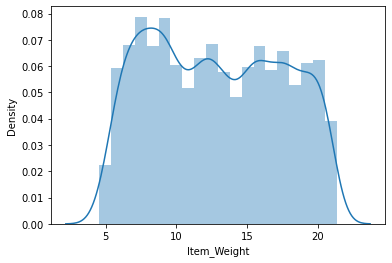

In [32]:
sns.distplot(train_data['Item_Weight'])

<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

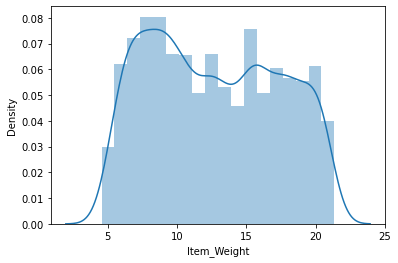

In [34]:
sns.distplot(test_data['Item_Weight'])

Both the plot is looking same in both the datasets. the items weight is in range between 4kg to 23 kg approx.

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

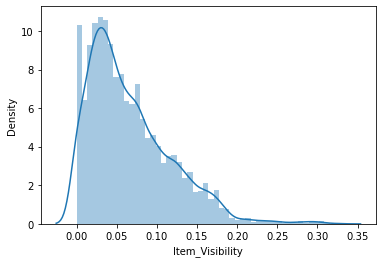

In [35]:
sns.distplot(train_data['Item_Visibility'])

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

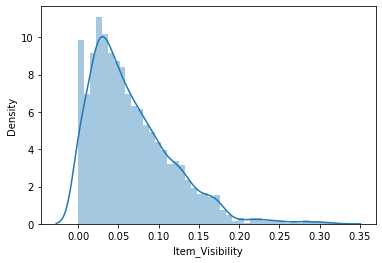

In [36]:
sns.distplot(test_data['Item_Visibility'])

skewness is present in the both the datasets.

In [38]:
#Removing skewness
train_data['Item_Visibility']=np.log(1+train_data['Item_Visibility'])

test_data['Item_Visibility']=np.log(1+test_data['Item_Visibility'])

<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

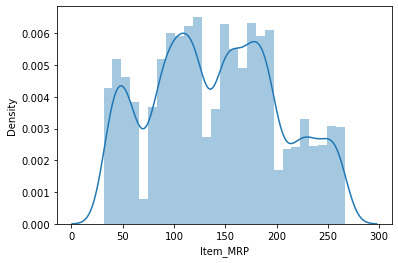

In [40]:
sns.distplot(train_data['Item_MRP'])


<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

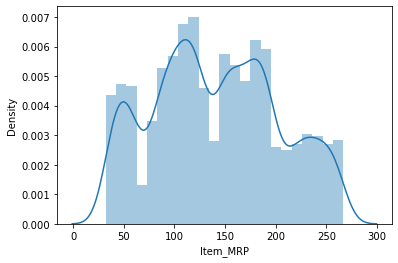

In [41]:
sns.distplot(test_data['Item_MRP'])

the price of item range in between 30 to 260 in both the datasets.

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

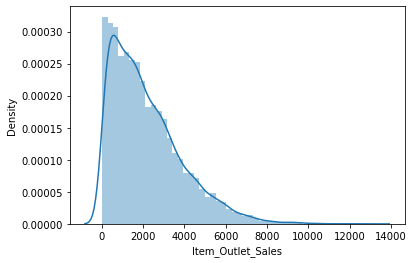

In [42]:
sns.distplot(train_data['Item_Outlet_Sales'])

The sales range in between 0 to 14000 , and skewness is present.



FOR CATEGORICAL COLUMNS

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

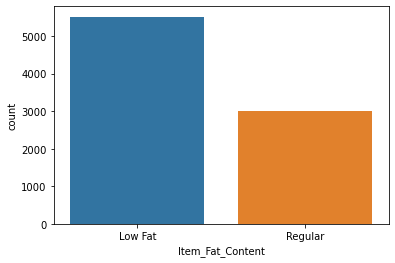

In [44]:
sns.countplot(train_data['Item_Fat_Content'])

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

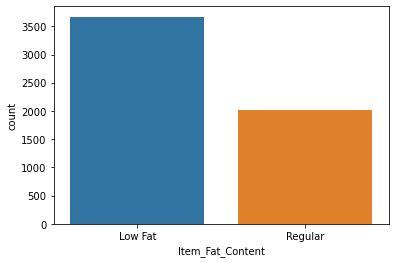

In [45]:
sns.countplot(test_data['Item_Fat_Content'])

Blue color is showing Low Fat item with approx 5500 and Yellow color is showing Regular item with approx 3000 in train_data.

Blue color is showing Low Fat item with approx 3700 and Yellow color is showing Regular item with approx 2000 in test_data.

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

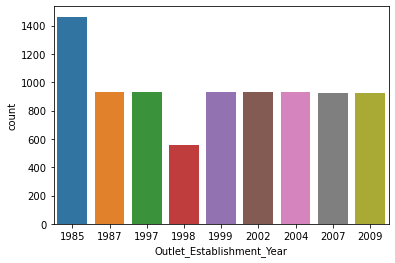

In [46]:
sns.countplot(train_data['Outlet_Establishment_Year'])

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

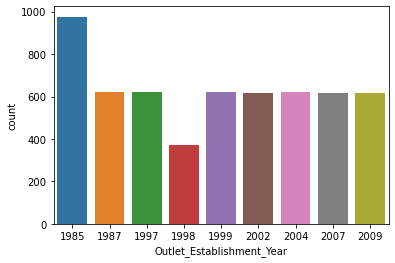

In [47]:
sns.countplot(test_data['Outlet_Establishment_Year'])

only one oulets have more number of count showing in blue color established in 1985 , other than that outlets are in equal distribution in both the datasets.

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

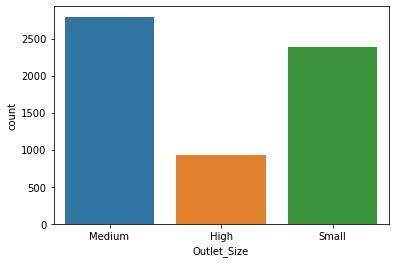

In [48]:
sns.countplot(train_data['Outlet_Size'])

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

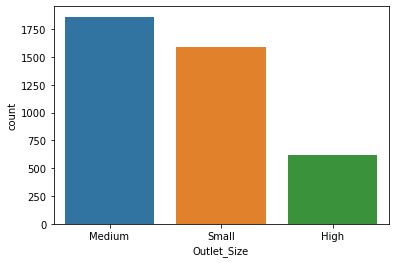

In [49]:
sns.countplot(test_data['Outlet_Size'])

(in train_data , most of the outlets are medium showing in blue color.

Medium outlets are ranging less than 3000.

High outlets are ranging approx 2500 showing in green color.)

(in test_data , most of the outlets are medium showing in blue color.

Medium outlets are ranging less than 2000 showing in blue color.

High outlets are ranging approx 700 showing in green color.)

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

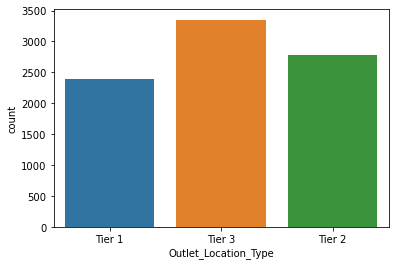

In [50]:
sns.countplot(train_data['Outlet_Location_Type'])

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

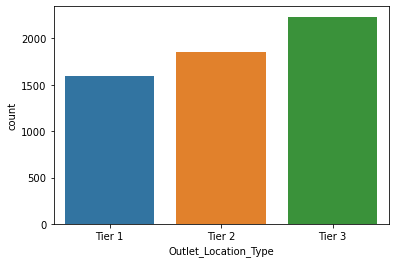

In [51]:
sns.countplot(test_data['Outlet_Location_Type'])

There is not much difference in the locations of the outlets in both the datasets.

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

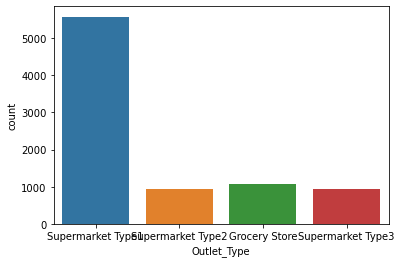

In [52]:
sns.countplot(train_data['Outlet_Type'])

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

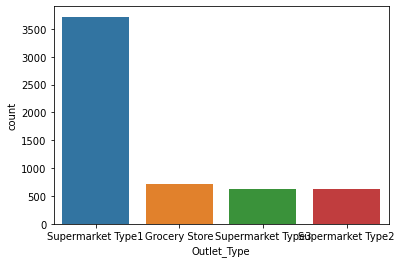

In [53]:
sns.countplot(test_data['Outlet_Type'])

we can see most of the outlets are supermarket type in both the datasets.

CORRELATION MATRIX

In [55]:
#train data
cor=train_data.corr()
cor


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,num_years
Item_Weight,1.000000,-0.013955,0.027141,-0.011588,0.014123,0.011588
Item_Visibility,-0.013955,1.000000,-0.000701,-0.072349,-0.125600,0.072349
Item_MRP,0.027141,-0.000701,1.000000,0.005020,0.567574,-0.005020
Outlet_Establishment_Year,-0.011588,-0.072349,0.005020,1.000000,-0.049135,-1.000000
Item_Outlet_Sales,0.014123,-0.125600,0.567574,-0.049135,1.000000,0.049135
num_years,0.011588,0.072349,-0.005020,-1.000000,0.049135,1.000000


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 [Text(0, 0.5, 'Item_Weight'),
  Text(0, 1.5, 'Item_Visibility'),
  Text(0, 2.5, 'Item_MRP'),
  Text(0, 3.5, 'Outlet_Establishment_Year'),
  Text(0, 4.5, 'Item_Outlet_Sales'),
  Text(0, 5.5, 'num_years')])

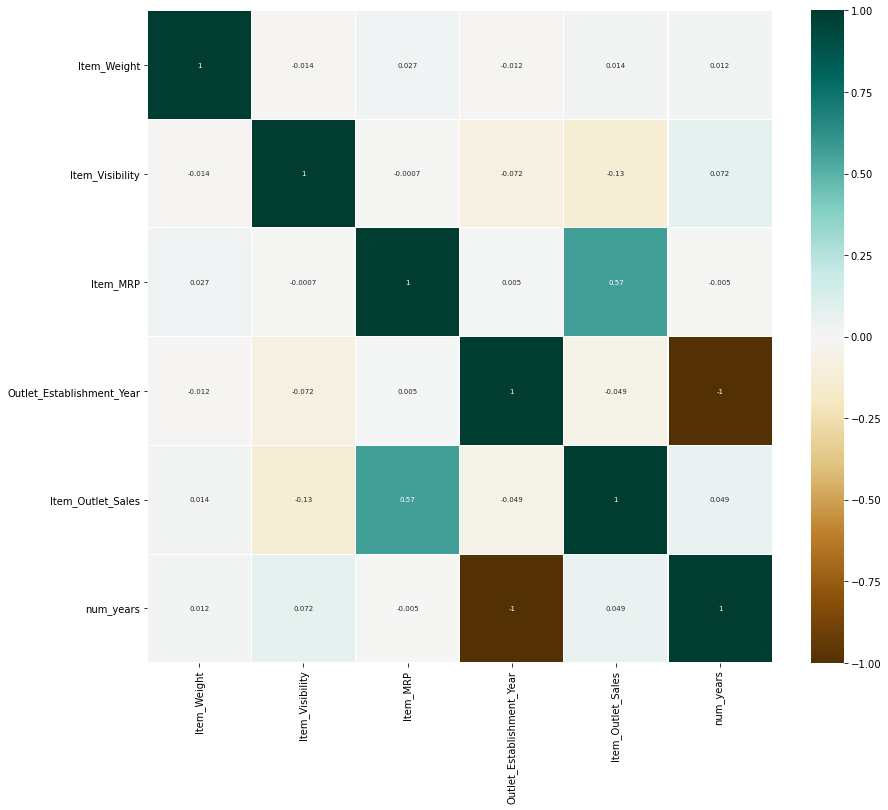

In [58]:
plt.figure(figsize=(14,12))
sns.heatmap(train_data.corr(),linewidths=.1,cmap="BrBG", annot=True, annot_kws={"size": 7})
plt.yticks(rotation=0)

Item_MRP is possitively correlated  with Item_Outlet_sales.

Item_MRP is negatively correlated with Item_Visibility.

In [59]:
##test data
corr=test_data.corr()
corr


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,num_years
Item_Weight,1.000000,-0.019427,0.049809,0.018918,-0.018918
Item_Visibility,-0.019427,1.000000,-0.013148,-0.095084,0.095084
Item_MRP,0.049809,-0.013148,1.000000,-0.007233,0.007233
Outlet_Establishment_Year,0.018918,-0.095084,-0.007233,1.000000,-1.000000
num_years,-0.018918,0.095084,0.007233,-1.000000,1.000000


(array([0.5, 1.5, 2.5, 3.5, 4.5]),
 [Text(0, 0.5, 'Item_Weight'),
  Text(0, 1.5, 'Item_Visibility'),
  Text(0, 2.5, 'Item_MRP'),
  Text(0, 3.5, 'Outlet_Establishment_Year'),
  Text(0, 4.5, 'num_years')])

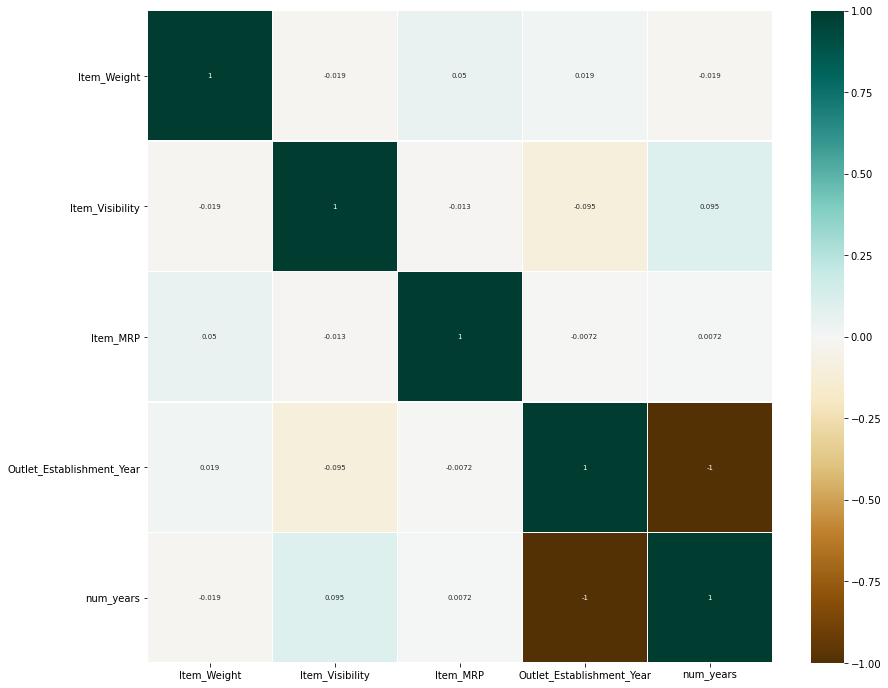

In [60]:
plt.figure(figsize=(14,12))
sns.heatmap(test_data.corr(),linewidths=.1,cmap="BrBG", annot=True, annot_kws={"size": 7})
plt.yticks(rotation=0)

correlation  matrix is showing some relations between the columns.

FILLING NULL VALUES

In [61]:
full_data=[train_data,test_data]

In [62]:
for data in full_data:
    data['Item_Weight'].fillna(data['Item_Weight'].mean(),inplace = True)
    data['Outlet_Size'].fillna('Medium',inplace = True)

In [63]:
col = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

HANDLING CATEGORICAL VARIABLES

In [64]:
train_datar = pd.get_dummies(train_data, columns = col, drop_first = True)
test_datar = pd.get_dummies(test_data, columns = col,drop_first = True)

In [65]:
feat_cols = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'num_years',
       'Item_Fat_Content_Regular', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3']

SPLITTING THE DATASETS

In [72]:
x = train_datar[feat_cols]
y = train_datar['Item_Outlet_Sales']

TRAIN TESTN SPLIT

In [73]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state = 0)

BUILDING MODEL

In [69]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso ,ElasticNet

In [74]:



#for Linear Regression

lr=LinearRegression()
lr.fit(x_train,y_train)
pred_y=lr.predict(x_test)
print('r2 score',r2_score(y_test,pred_y))

print('error')
print('mean absolute error', mean_absolute_error(y_test,pred_y))
print('mean squared error', mean_squared_error(y_test,pred_y))

print('root mean squared error', np.sqrt(mean_squared_error(y_test,pred_y)))

r2 score 0.5620662805850926
error
mean absolute error 852.4482045517628
mean squared error 1281770.446388599
root mean squared error 1132.1530136817191


In [75]:
lr.coef_

array([-1.54701750e+00, -4.07745311e+02,  1.55483807e+01, -4.41284710e+01,
        3.35756041e+01, -6.05211760e+01, -6.97404187e-01,  1.71647671e+01,
       -1.17634912e+02, -6.78001391e+01, -1.11740205e+01, -1.39205393e+01,
       -4.94714218e+01, -6.58978242e+01, -2.06293917e+01, -4.05347952e+01,
        1.80291280e+02, -2.61150233e+01, -7.59627607e+01,  7.03868143e+01,
       -9.63572103e+02, -8.96622696e+02, -2.48549917e+02, -4.84185153e+02,
        1.41047213e+03,  1.11224952e+03,  3.89702394e+03])

coefficient of the Linear Regression

In [76]:
#For Lasso
from sklearn.linear_model import Lasso

ls=Lasso()

ls.fit(x_train,y_train)
pred_y=ls.predict(x_test)
print('r2 score',r2_score(y_test,pred_y))

print('error')
print('mean absolute error', mean_absolute_error(y_test,pred_y))
print('mean squared error', mean_squared_error(y_test,pred_y))

print('root mean squared error', np.sqrt(mean_squared_error(y_test,pred_y)))


r2 score 0.5623034303508442
error
mean absolute error 851.0655283773598
mean squared error 1281076.3423549691
root mean squared error 1131.846430552736


In [77]:
ls.coef_

array([-1.39168436e+00, -0.00000000e+00,  1.55428868e+01, -1.23970678e+01,
        3.53617472e+01, -2.29738769e+00,  0.00000000e+00,  2.65000829e+01,
       -8.15619697e+01, -3.28629946e+01,  4.32982118e+00,  0.00000000e+00,
       -4.93757191e+00, -2.95030145e+01,  0.00000000e+00, -0.00000000e+00,
        6.15493758e+01, -0.00000000e+00, -2.96762591e+01,  3.90883456e+01,
       -1.03545235e+02, -5.70703244e+01, -4.64258411e+01, -0.00000000e+00,
        1.84974795e+03,  1.39919113e+03,  3.42143889e+03])

coefficient of the Lasso Regression

In [78]:
# for Ridge
from sklearn.linear_model import Ridge

#For Ridge

rd=Ridge()

rd.fit(x_train,y_train)
pred_y=rd.predict(x_test)
print('r2 score',r2_score(y_test,pred_y))

print('error')
print('mean absolute error', mean_absolute_error(y_test,pred_y))
print('mean squared error', mean_squared_error(y_test,pred_y))

print('root mean squared error', np.sqrt(mean_squared_error(y_test,pred_y)))



r2 score 0.5620560343847554
error
mean absolute error 852.1876367965333
mean squared error 1281800.4355769116
root mean squared error 1132.1662579219146


In [79]:
rd.coef_

array([-1.53701065e+00, -3.94765772e+02,  1.55475604e+01, -3.80385694e+01,
        3.36693638e+01, -5.97516066e+01, -4.59708054e-01,  1.76942153e+01,
       -1.16712662e+02, -6.68692913e+01, -1.08125203e+01, -1.41468356e+01,
       -4.87140753e+01, -6.50147894e+01, -1.98185431e+01, -4.02190575e+01,
        1.76596815e+02, -2.53136465e+01, -7.50165985e+01,  7.10660754e+01,
       -8.01259134e+02, -7.39975614e+02, -2.10647253e+02, -3.93612240e+02,
        1.48819025e+03,  1.16218093e+03,  3.79723806e+03])

coefficient of the Ridge Regression

In [80]:
#For ElasticNet
from sklearn.linear_model import ElasticNet


en=ElasticNet()

en.fit(x_train,y_train)
pred_y=en.predict(x_test)
print('r2 score',r2_score(y_test,pred_y))

print('error')
print('mean absolute error', mean_absolute_error(y_test,pred_y))
print('mean squared error', mean_squared_error(y_test,pred_y))

print('root mean squared error', np.sqrt(mean_squared_error(y_test,pred_y)))


r2 score 0.36569735033817197
error
mean absolute error 1020.9658499204712
mean squared error 1856514.706126638
root mean squared error 1362.539799832151


In [81]:
en.coef_

array([-1.83675734e+00, -1.72318667e+01,  1.55607012e+01,  1.01891817e+01,
        9.24908875e+00, -0.00000000e+00, -1.26768137e+00,  1.15974699e+01,
       -1.13328374e+01, -4.49831862e+00,  5.07484683e+00,  4.57929581e-01,
       -1.10603331e-01, -5.24977867e+00, -6.59990423e-01, -3.03280009e+00,
        1.09587253e+00,  2.03177112e+00, -1.57452918e+00,  3.66788695e+00,
        9.34575346e+01, -9.06789789e+01,  9.00565186e+01,  3.94664991e+01,
        1.65692571e+02, -4.37995343e-01,  2.62793366e+02])

coefficient of ElasticNet regression

CROSS VALIDATION

In [82]:
# For Linear Regression


score=cross_val_score(lr,x,y,cv=5)
print('cv score',np.mean(score))


cv score 0.5587468379325318


In [83]:
# For Lasso


score=cross_val_score(ls,x,y,cv=5)
print('cv score',np.mean(score))

cv score 0.5593314942346627


In [84]:
# For Ridge


score=cross_val_score(rd,x,y,cv=5)
print('cv score',np.mean(score))

cv score 0.558762958301401


In [85]:

#For ElasticNet

score=cross_val_score(en,x,y,cv=5)
print('cv score',np.mean(score))

cv score 0.3712623961373764


cross validation score is almost 55% of Linear Regression ,Lasso, ridge and 37% of ElasticNet. 

HYPER PARAMETER TUNING

In [91]:
from sklearn.model_selection import GridSearchCV

model =LinearRegression()
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid = GridSearchCV(model,parameters, cv=None)
grid.fit(X_train, y_train)
print ("r2 score : ", grid.best_score_)
print("Residual sum of squares: %.2f"
              % np.mean((grid.predict(X_test) - y_test) ** 2))
print('mean absolute error', mean_absolute_error(y_test,pred_y))
print('mean squared error', mean_squared_error(y_test,pred_y))

print('root mean squared error', np.sqrt(mean_squared_error(y_test,pred_y)))


r2 score :  0.559815340390128
Residual sum of squares: 1281486.40
mean absolute error 1020.9658499204712
mean squared error 1856514.706126638
root mean squared error 1362.539799832151


getiing 55% r2 score after cross validation and hyper parameter tuning.

PREDICTIING THE MODEL ON TEST DATA

In [93]:
X_t = test_datar[feat_cols]
y_result = lr.predict(X_t)

In [94]:
y_result

array([1816.20711256, 1550.29776246, 1918.68156151, ..., 1836.65402091,
       3668.98343009, 1320.38271421])

SAVING THE RESULT ON THE CSV FILE

In [95]:
result = pd.DataFrame()
result['Item_Identifier'] = test_datar['Item_Identifier']
result['Outlet_Identifier'] = test_datar['Outlet_Identifier']

result["Item_Outlet_Sales"] = y_result
result = result.sort_index()
result.to_csv('Bigmart_LinearRegression.csv',index = False)

In [96]:
df=pd.read_csv('Bigmart_LinearRegression.csv')
df.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1816.207113
1,FDW14,OUT017,1550.297762
2,NCN55,OUT010,1918.681562
3,FDQ58,OUT017,2671.760411
4,FDY38,OUT027,5077.479736


That will be the sales ,nd here is only 5 heads of the datasset.